In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
startups_df = pd.read_csv('/content/startup_clustor.csv')
startups_df.head()

,correct_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors
0,121Policy,0.0000,0.00,1,2016.00,1
1,19th mile,1.5400,1.54,1,2018.00,5
2,1Crowd,0.0000,0.00,1,2017.00,1
3,1mg,85.7725,343.09,4,2016.75,6
4,1mg (Healthkartplus),51.4600,51.46,1,2015.00,4


In [ ]:
startups_df['correct_name'] = startups_df['correct_name'].str.replace('Ola Electric', 'Ola')
startups_df['correct_name'] = startups_df['correct_name'].str.replace('Ola Cabs', 'Ola')

In [ ]:
startups_df[startups_df['correct_name'].str.contains('Ola', case=False)]

,correct_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors
97,Applied Solar Technologies,343.080000,343.08,1,2015.000000,3
546,EzySolare,0.000000,0.00,1,2015.000000,1
810,holachef,14.344000,71.72,5,2016.200000,4
1014,Kolabro,0.000000,0.00,1,2015.000000,2
1308,Ola,2111.015000,8444.06,4,2016.500000,7
1309,Ola,1019.423333,9174.81,9,2016.333333,9
1310,Ola,0.000000,0.00,1,2019.000000,1
1333,Oriano Solar,25.730000,25.73,1,2017.000000,1
1685,SolarTown,1.720000,1.72,1,2016.000000,1
1874,Truckola,5.100000,5.10,1,2016.000000,6


In [ ]:
startups_df.set_index('correct_name', inplace=True)

In [ ]:
startups_df.head()

,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors
correct_name,,,,,
121Policy,0.0000,0.00,1,2016.00,1
19th mile,1.5400,1.54,1,2018.00,5
1Crowd,0.0000,0.00,1,2017.00,1
1mg,85.7725,343.09,4,2016.75,6
1mg (Healthkartplus),51.4600,51.46,1,2015.00,4


In [ ]:
scaler_startups = StandardScaler()
startups_scaled = scaler_startups.fit_transform(startups_df)

In [ ]:
startups_df1 = pd.DataFrame(startups_scaled, columns=startups_df.columns)

In [ ]:
startups_df1

,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors
0,-0.094441,-0.105998,-0.405344,-0.277706,-0.654076
1,-0.092446,-0.104875,-0.405344,1.715687,1.525664
2,-0.094441,-0.105998,-0.405344,0.718991,-0.654076
3,0.016648,0.144353,3.275715,0.469816,2.070600
4,-0.027792,-0.068448,-0.405344,-1.274403,0.980729
...,...,...,...,...,...
2117,-0.072229,-0.093484,-0.405344,-1.274403,-0.109141
2118,-0.087214,-0.101927,-0.405344,-0.277706,-0.654076
2119,-0.092446,-0.104875,-0.405344,-0.277706,-0.109141
2120,-0.091669,-0.104437,-0.405344,-0.277706,-0.654076


In [ ]:
startups_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg_Investment    2122 non-null   float64
 1   Total_Investment  2122 non-null   float64
 2   Num_Deals         2122 non-null   float64
 3   Avg_Year          2120 non-null   float64
 4   Unique_Investors  2122 non-null   float64
dtypes: float64(5)
memory usage: 83.0 KB


In [ ]:
startups_df1 = startups_df1.fillna(0)

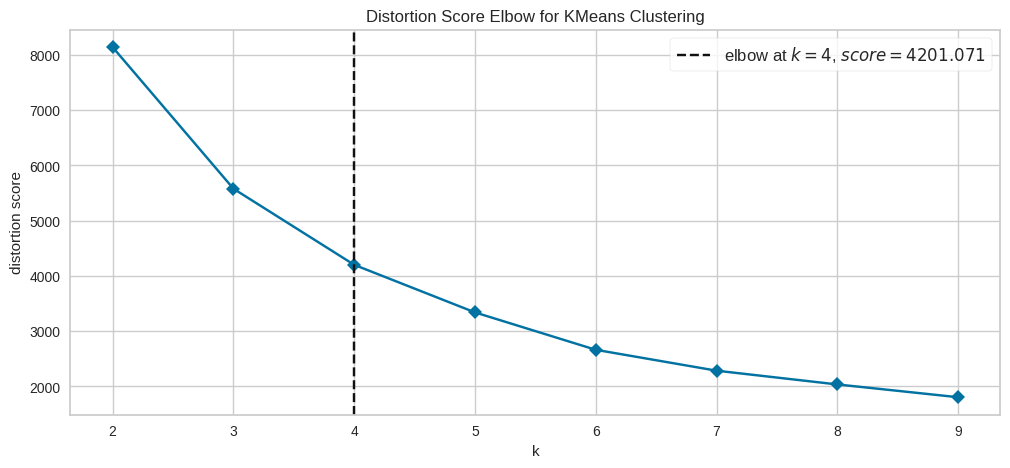

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)
fig, ax = plt.subplots(figsize=(12,5))
visualizer = KElbowVisualizer(km, k=(2,10), timings=False, ax=ax)
visualizer.fit(startups_df1)
visualizer.show()

In [ ]:
kmeans_investor = KMeans(n_clusters=4, random_state=42)
startups_df['Cluster'] = kmeans_investor.fit_predict(startups_df1)

In [ ]:
startups_df

,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
correct_name,,,,,,
121Policy,0.0000,0.00,1,2016.00,1,2
19th mile,1.5400,1.54,1,2018.00,5,0
1Crowd,0.0000,0.00,1,2017.00,1,0
1mg,85.7725,343.09,4,2016.75,6,3
1mg (Healthkartplus),51.4600,51.46,1,2015.00,4,2
...,...,...,...,...,...,...
ZuperMeal,17.1500,17.15,1,2015.00,2,2
Zuppler,5.5800,5.58,1,2016.00,1,2
Zuver,1.5400,1.54,1,2016.00,2,2


In [ ]:
startups_df['Cluster'].value_counts()

,count
Cluster,
2,1241
0,666
3,214
1,1


In [ ]:
startups_df.to_csv('startups_cluster.csv')

In [ ]:
df= pd.read_csv('/content/startups_cluster.csv')
df.head()

,correct_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
0,121Policy,0.0000,0.00,1,2016.00,1,2
1,19th mile,1.5400,1.54,1,2018.00,5,0
2,1Crowd,0.0000,0.00,1,2017.00,1,0
3,1mg,85.7725,343.09,4,2016.75,6,3
4,1mg (Healthkartplus),51.4600,51.46,1,2015.00,4,2


In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
2,1241
0,666
3,214
1,1


In [ ]:
df[df['Cluster']==1]

,correct_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
1490,Rapido Bike Taxi,33450.3,33450.3,1,2019.0,1,1


In [ ]:
df1 = pd.read_csv('/content/investor_clustor.csv')
df1.head()

,Investor,Avg_Investment,Total_Investment,Num_Deals,Unique_Startups,Avg_Year,Cluster
0,Tiger Global Management,344.87619,7242.40,21,20,2016.476190,1
1,Susquehanna Growth Equity,248.94000,497.88,2,2,2018.500000,0
2,Sequoia Capital India,396.70500,7140.69,18,17,2017.333333,1
3,Vinod Khatumal,25.73000,25.73,1,1,2020.000000,0
4,Sprout Venture Partners,7.72000,15.44,2,2,2019.000000,0


In [ ]:
df1['Cluster'].value_counts()

,count
Cluster,
4,836
0,673
1,56
3,9
2,2


In [ ]:
df1[df1['Cluster']==2]

,Investor,Avg_Investment,Total_Investment,Num_Deals,Unique_Startups,Avg_Year,Cluster
19,Accel,156.311238,16412.68,105,78,2016.219048,2
73,Undisclosed,23.627660,3331.50,141,137,2016.134752,2


In [ ]:
df.head()

,correct_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
0,121Policy,0.0000,0.00,1,2016.00,1,2
1,19th mile,1.5400,1.54,1,2018.00,5,0
2,1Crowd,0.0000,0.00,1,2017.00,1,0
3,1mg,85.7725,343.09,4,2016.75,6,3
4,1mg (Healthkartplus),51.4600,51.46,1,2015.00,4,2


In [ ]:
# similar startups
df.rename(columns={'correct_name':'startup_name'}, inplace=True)
temp_cluster = df[df['startup_name'].str.contains('19th mile', case=False)]['Cluster'].values[0]

In [ ]:
df[df['Cluster'] == temp_cluster].sort_values(by='Total_Investment', ascending=False).loc[:,['startup_name',	'Avg_Investment',	'Total_Investment',	'Num_Deals',	'Unique_Investors']].reset_index(drop=True)[:5]

,startup_name,Avg_Investment,Total_Investment,Num_Deals,Unique_Investors
0,Automation Anywhere,2573.10,2573.10,1,1
1,Vogo Automotive,2427.29,2427.29,1,3
2,Edelweiss,2315.79,2315.79,1,1
3,Digital Mall Asia,1886.94,1886.94,1,1
4,Paytm Marketplace,1715.40,1715.40,1,1


In [ ]:
df[df['startup_name'].str.contains('19th mile', case=False)]

,startup_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
1,19th mile,1.54,1.54,1,2018.0,5,0


In [ ]:
df_cleaned=pd.read_csv('/content/Startups_cleaned_df3.csv')
df_cleaned.head()

,Date,StartUp,Vertical,SubVertical,City,Investor,Round,Amount in Cr,Year,Month,Startup_lower
0,2020-01-09,BYJU'S,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,1715.40,2020.0,1.0,byju’s
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,69.03,2020.0,1.0,shuttl
2,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,157.46,2020.0,1.0,mamaearth
3,2020-01-02,weathbucket,Fin-Tech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.73,2020.0,1.0,weathbucket
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.44,2020.0,1.0,fashor


In [ ]:
df_cleaned[df_cleaned['StartUp'].str.contains('1mg', case=False)]

,Date,StartUp,Vertical,SubVertical,City,Investor,Round,Amount in Cr,Year,Month,Startup_lower
293,2018-04-27,1mg,E-Commerce,Online Pharmacy Store,Gurugram,"Sequoia Capital, Maverick Capital Ltd and HBM ...",Private Equity,85.77,2018.0,4.0,1mg
693,2017-07-27,1mg,E-Commerce,Online Pharmacy,Gurugram,"HBM Healthcare Investments, Maverick Capital V...",Private Equity,128.66,2017.0,7.0,1mg
1711,2016-05-31,1mg,E-Commerce,Online Pharmacy,Gurugram,HBM Healthcare Investments,Private Equity,0.00,2016.0,5.0,1mg
1766,2016-04-20,1mg,E-Commerce,Online Pharmacy,Gurugram,"Maverick Capital Ventures, Sequoia Capital, Om...",Private Equity,128.66,2016.0,4.0,1mg
2794,2015-04-20,1mg (Healthkartplus),Online Pharmacy & Drug DB,Not Specified,Gurugram,"Deep Kalra, Sequoia Capital, Omidyar Network, ...",Private Equity,51.46,2015.0,4.0,1mg (healthkartplus)


In [ ]:
df_cleaned[df_cleaned['StartUp'].str.contains('1mg', case=False)].index

Index([293, 693, 1711, 1766, 2794], dtype='int64')

In [ ]:
df_cleaned.loc[[293, 693, 1711, 1766, 2794], 'Vertical']= 'E-Pharmacy & Drug DB'

In [ ]:
df_cleaned.loc[[293, 693, 1711, 1766, 2794]]

,Date,StartUp,Vertical,SubVertical,City,Investor,Round,Amount in Cr,Year,Month,Startup_lower
293,2018-04-27,1mg,E-Pharmacy & Drug DB,Online Pharmacy Store,Gurugram,"Sequoia Capital, Maverick Capital Ltd and HBM ...",Private Equity,85.77,2018.0,4.0,1mg
693,2017-07-27,1mg,E-Pharmacy & Drug DB,Online Pharmacy,Gurugram,"HBM Healthcare Investments, Maverick Capital V...",Private Equity,128.66,2017.0,7.0,1mg
1711,2016-05-31,1mg,E-Pharmacy & Drug DB,Online Pharmacy,Gurugram,HBM Healthcare Investments,Private Equity,0.00,2016.0,5.0,1mg
1766,2016-04-20,1mg,E-Pharmacy & Drug DB,Online Pharmacy,Gurugram,"Maverick Capital Ventures, Sequoia Capital, Om...",Private Equity,128.66,2016.0,4.0,1mg
2794,2015-04-20,1mg (Healthkartplus),E-Pharmacy & Drug DB,Not Specified,Gurugram,"Deep Kalra, Sequoia Capital, Omidyar Network, ...",Private Equity,51.46,2015.0,4.0,1mg (healthkartplus)


In [ ]:
df_cleaned.to_csv('Startups_cleaned_df4.csv', index=False)

In [ ]:
pd.read_csv('/content/Startups_cleaned_df4.csv').head()

,Date,StartUp,Vertical,SubVertical,City,Investor,Round,Amount in Cr,Year,Month,Startup_lower
0,2020-01-09,BYJU'S,Ed-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,1715.40,2020.0,1.0,byju’s
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,69.03,2020.0,1.0,shuttl
2,2020-01-09,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,157.46,2020.0,1.0,mamaearth
3,2020-01-02,weathbucket,Fin-Tech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,25.73,2020.0,1.0,weathbucket
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,15.44,2020.0,1.0,fashor


In [ ]:
df.head()

,startup_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
0,121Policy,0.0000,0.00,1,2016.00,1,2
1,19th mile,1.5400,1.54,1,2018.00,5,0
2,1Crowd,0.0000,0.00,1,2017.00,1,0
3,1mg,85.7725,343.09,4,2016.75,6,3
4,1mg (Healthkartplus),51.4600,51.46,1,2015.00,4,2


In [ ]:
round(df1['Avg_Year'])

,Avg_Year
0,2016.0
1,2018.0
2,2017.0
3,2020.0
4,2019.0
...,...
1571,2015.0
1572,2015.0
1573,2015.0
1574,2015.0


In [ ]:
df[df['startup_name'].str.contains('Ola', case=False)]

,startup_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
97,Applied Solar Technologies,343.080000,343.08,1,2015.000000,3,2
546,EzySolare,0.000000,0.00,1,2015.000000,1,2
810,holachef,14.344000,71.72,5,2016.200000,4,3
1014,Kolabro,0.000000,0.00,1,2015.000000,2,2
1308,Ola,2111.015000,8444.06,4,2016.500000,7,3
1309,Ola Cabs,1019.423333,9174.81,9,2016.333333,9,3
1310,Ola Electric,0.000000,0.00,1,2019.000000,1,0
1333,Oriano Solar,25.730000,25.73,1,2017.000000,1,0
1685,SolarTown,1.720000,1.72,1,2016.000000,1,2
1874,Truckola,5.100000,5.10,1,2016.000000,6,2


In [ ]:
df.loc[[1308, 1309, 1310]]

,startup_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
1308,Ola,2111.015000,8444.06,4,2016.500000,7,3
1309,Ola Cabs,1565.219167,17618.87,9,2016.333333,9,3
1310,Ola Electric,0.000000,0.00,1,2019.000000,1,0


In [ ]:
df.loc[1309, 'Total_Investment'] = df.loc[1309, 'Total_Investment'] + 8444.06

In [ ]:
df.drop([1308, 1310], inplace=True)

In [ ]:
df.to_csv('startup_cluster1.csv', index=False)

In [ ]:
pd.read_csv('/content/startup_cluster1.csv').head()

,startup_name,Avg_Investment,Total_Investment,Num_Deals,Avg_Year,Unique_Investors,Cluster
0,121Policy,0.0000,0.00,1,2016.00,1,2
1,19th mile,1.5400,1.54,1,2018.00,5,0
2,1Crowd,0.0000,0.00,1,2017.00,1,0
3,1mg,85.7725,343.09,4,2016.75,6,3
4,1mg (Healthkartplus),51.4600,51.46,1,2015.00,4,2


In [ ]:
df1.head()

,Investor,Avg_Investment,Total_Investment,Num_Deals,Unique_Startups,Avg_Year,Cluster
0,Tiger Global Management,344.87619,7242.40,21,20,2016.476190,1
1,Susquehanna Growth Equity,248.94000,497.88,2,2,2018.500000,0
2,Sequoia Capital India,396.70500,7140.69,18,17,2017.333333,1
3,Vinod Khatumal,25.73000,25.73,1,1,2020.000000,0
4,Sprout Venture Partners,7.72000,15.44,2,2,2019.000000,0


In [ ]:
df1[df1['Investor'] == 'Tiger Global Management']['Unique_Startups'].values[0]

np.int64(20)

In [ ]:
df1[df1['Investor'].str.contains('Tiger Global Management', case=False)].sort_values('Avg_Investment', ascending=False).iloc[:5, :5]

,Investor,Avg_Investment,Total_Investment,Num_Deals,Unique_Startups
0,Tiger Global Management,344.87619,7242.4,21,20
